In [7]:
from hydra import initialize, compose
from pathlib import Path
import pandas as pd

from src.utils.general_utils import (
    create_dataframe_with_image_info,
    download_to,
    extract_file,
    return_list_of_files,
)

with initialize(version_base=None, config_path="configs"):
    # config is relative to a module
    cfg = compose(config_name="config")


In [8]:
cfg.data_module.dataset.train_dir

'./data/rsna'

In [9]:
train_dir: Path = Path(cfg.data_module.dataset.train_dir)
train_images = return_list_of_files(
    train_dir, extensions=[".jpg", ".png", ".jpeg"], return_string=False
)


In [10]:
len(train_images)

0

In [11]:
cfg.data_module.dataset.train_csv

'./data/rsna/train.csv'

In [12]:
df = pd.read_csv(cfg.data_module.dataset.train_csv)

In [13]:
df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,image_path,class_name
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,data/rsna/10006/462822612.png,benign
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,data/rsna/10006/1459541791.png,benign
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,data/rsna/10006/1864590858.png,benign
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,data/rsna/10006/1874946579.png,benign
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,data/rsna/10011/220375232.png,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False,data/rsna/9973/1729524723.png,benign
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False,data/rsna/9989/63473691.png,benign
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False,data/rsna/9989/1078943060.png,benign
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True,data/rsna/9989/398038886.png,benign


In [14]:
df["cancer"].value_counts()

0    53548
1     1158
Name: cancer, dtype: int64

<AxesSubplot: >

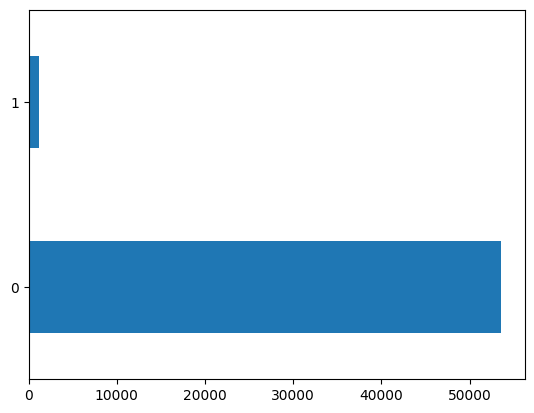

In [8]:
df["cancer"].value_counts().plot(kind='barh')


In [9]:
train_images

[PosixPath('data/rsna/10006/1459541791.png'),
 PosixPath('data/rsna/10006/1864590858.png'),
 PosixPath('data/rsna/10006/1874946579.png'),
 PosixPath('data/rsna/10006/462822612.png'),
 PosixPath('data/rsna/10011/1031443799.png'),
 PosixPath('data/rsna/10011/220375232.png'),
 PosixPath('data/rsna/10011/270344397.png'),
 PosixPath('data/rsna/10011/541722628.png'),
 PosixPath('data/rsna/10025/1365269360.png'),
 PosixPath('data/rsna/10025/288394860.png'),
 PosixPath('data/rsna/10025/562340703.png'),
 PosixPath('data/rsna/10025/893612858.png'),
 PosixPath('data/rsna/10038/1350492010.png'),
 PosixPath('data/rsna/10038/1967300488.png'),
 PosixPath('data/rsna/10038/2142944869.png'),
 PosixPath('data/rsna/10038/850559196.png'),
 PosixPath('data/rsna/10042/102733848.png'),
 PosixPath('data/rsna/10042/1648588715.png'),
 PosixPath('data/rsna/10042/202939811.png'),
 PosixPath('data/rsna/10042/294481519.png'),
 PosixPath('data/rsna/10042/495770405.png'),
 PosixPath('data/rsna/10048/1234933874.png'),


In [32]:
df['image_path'] = df[["patient_id", "image_id"]].astype(str).apply(lambda x: 'data/rsna/'+'/'.join(x)+'.png', axis=1)


In [23]:
def get_key_by_value(x):
    mapping = cfg.data_module.dataset.class_name_to_id
    return list(mapping.keys())[list(mapping.values()).index(x)]

In [24]:
df["class_name"] = df["cancer"].apply(get_key_by_value)


In [25]:
df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,image_path,class_name
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,data/rsna/10006/462822612.png,benign
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,data/rsna/10006/1459541791.png,benign
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,data/rsna/10006/1864590858.png,benign
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,data/rsna/10006/1874946579.png,benign
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,data/rsna/10011/220375232.png,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False,data/rsna/9973/1729524723.png,benign
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False,data/rsna/9989/63473691.png,benign
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False,data/rsna/9989/1078943060.png,benign
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True,data/rsna/9989/398038886.png,benign


In [26]:
df.to_csv('train.csv', index=False)